# INTRODUCTION


Thanks to modern medicine, many legacy diseases have been eradicated from the face of earth. However, due to change of climate and lifestyle, one disease started to show up much more than a century ago. 

**Mole Prediction:** Cancer, due to its unpredictable and silent growth is known as one of the biggest threats to human kind. Although the carcinoma which affects the vital organs cannot be effectively early-diagnosed yet due to its silent nature, melanoma on the other hand can be diagnosed early to prevent metastasis and provide a better chance of survival. Please follow the notebook in parallel from  [GitHub Repo](https://https://github.com/trickydaze/Mole-Detector-App).
Note: My actual goal was to recreate the notebook on the GitHub Repo with more evaluation metrics and merge this notebook with the original on GitHub, however I could not locate the image files used for the model, therefore I did not want to risk 'null'ing the whole repo with a pull-push.

**Drug Prediction**
There are a lot of different angles that will be useful to predict a drug, it could be to predict the response of the patient or the type of drug to be prescribed to the patient as predicting from the previous patient that used the same drug. It could potentially minimise the risk of lethal side effects and avoid switching drugs for efficiency.

**Visual Stimuli Prediction**
Human being's olfactory processes and perception are a fascinating field and being able to do a well-educated guess of one's perception or action with a glance at their functional MRI files is a dream come true. It unravels the whole idea of understanding the activation processes and it will give us a better insight on how to control certain activations which could be called positive symptoms. Please go to **nilearn_haxby.ipynb** for its individual explanation.

**Alzheimer's Disease:**  --in the works, deciphering the types of image classification, VGG19, VGG16--
World population is getting older as we speak and in about 30 years more than 70% of today's population will be vulnerable to neurodegenerative diseases such as Alzheimer's disease. Therefore, it is vital to early diagnose and tackle big mishaps that dementia could cause to general population and improve the quality of life.

For all three cases, with the population growing as fast as it has been, there is not enough health workforce capacity for regular check-ups. For this very reason, artificial intelligence can step in to take over the preliminary checks and refer to a health professional if there is a reason of concern. It does not require insurance, it does not require extra fees and it works 24/7 (maybe excluding maintenance). This method will also eliminate the work pressure which the doctor would be under, aids them to focus on the cases which require extra attention.

IMPORTANT: From this point onwards, this notebook will serve as a parallel explanation point for Mole Prediction example due to reasons explained above.
 For drug prediction: **drug_prediction.ipynb**
 For visual stimuli prediction: **nilearn_haxby.ipynb**
 For Alzheimer's : click on **Alzheimer** directory - WARNING: still experimenting.



--------------------------

## Mole Prediction GitHub File Structure
1) healtcare_jupyter.ipynb - Main Jupyter Notebook
2) clin_dia.csv - CSV file received to index the image data
3) mole_model.ipynb - Secondary Jupyter Notebook - similar process without preprocessing
4) Procfile, setup.sh and requirements.txt - Dependencies for Heroku and Streamlit Deployment
5) app.py - Streamlit script for an uploader, prediction model function "teachable_machine_classification" from **img_classification.py**
6) img_classification.py - Function used in app.py in order to predict the class of an uploaded image on the deployed API



# METHOD

## 1)DATA ACQUISITION 
On this challenge, we have first received a .csv file with the image directory with their diagnosis (as malignant and benign). The data which is 3000 images of moles has been scraped online and a .csv file which helps us determine them as malignant or benign in the context of the image.

## 2)PREPROCESSING

### DATA CLEANING
In any of the data science/AI project, if the initiative or goal is reliant on certain columns, it is imperative to remove any irrelevant column/data and drop or impute missing data to increase validity and readability. For this project, we dropped irrelevant columns and organised the file index and which category they belonged (id and kat_diagnose columns), in order to place in their respective folders later.

>>data.drop(['klin. Diagn.', "nr", 'Histo performed', 'Diagnose red.'], axis=1, inplace=True)


### DATA QUALITY
We have then checked if any of the columns had missing data and/or any data that is not in a certain disposition. 
Within our project, we were communicated that the category of any benign mole was '1' and all of the other numbers '2,3 or ?' were malignant. 


*  In order to ease the process for a binary model, we have replaced 1 with 0 and any other number or ? with 1.
*  After the enumeration, beneficial to match the data files we have received, we have then renamed the index column values as the files that they correspond to (*d1.bmp*). 
*   Although it is not stated at the Jupiter Notebook, we have created our data trail at the same root we have found all of the data "asset" folder as 
Training and Testing (validation) -->  Malignant or Benign
for easier fitting for the model.

## DATA INTEGRITY AND BALANCE
As seen on the classification below,



In [ ]:
data['kat.Diagnose'].value_counts()


<pre>0    2362
     1     638
Name: kat.Diagnose, dtype: int64</pre>

we unfortunately did not have a balanced dataset which will require us to be tactical with regard to the data we are handling.
>> At this stage, ImageDataGenerator saves the day. Keras image data generator is used for the generation of the batches containing the data of tensor images and is used in the domain of real-time data augmentation. 
We have two variables as training and test data generator which we then feed to flow_from_directory function that classifies, rescales and prepares the data to be of the same standard for all.



## 3) MACHINE LEARNING

After preprocessing, we are then ready to create our model and then fit our data to the model to train and then evaluate.

### *Model Choices 
We have chose a Sequential model which allows you to layer together (especially useful for Convolutional Neural Networks which we will layer our model with).
Convolutional Neural Networks are mainly used for image classification and the main advantage of it is the convolutional layers reduce the high dimensionality without losing any vital information.
After choosing the model,choosing the right parameters for the layers were so easy due to our set up with image data generator. 
Activation function 'relu' is the most popular one and it has a good reason, due to its ease of converging however this makes the model susceptible to overfitting which is why it is important to use 'drop out' after a certain number of 'relu' activation functions at least 20% of the neurons to prevent invalidation.



In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model_trained=model.fit_generator(
        train_batches,
        steps_per_epoch=2000 // 32,
        epochs=5,
        validation_data=test_batches,
        validation_steps=800 // 32)

## 4) DEPLOYMENT & API

We have then created a Procfile and requirements.txt to deploy as a container to Heroku and for the rest API visuality we have used Streamlit "app.py" basic however functional image uploading and classification mechanism that *was* accessible via https://moledetector.herokuapp.com

# RESULTS



We have experimented a number of times and we have found 3 convolutional layers to be the best success in terms of both loss and accuracy. 

> **Best score:**
>
> Epoch 3/5
62/62 [==============================] - 52s 834ms/step - loss: 0.4864 - accuracy: 0.7995

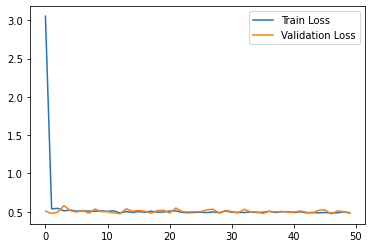


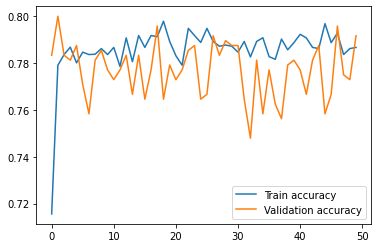

# DISCUSSION

The biggest challenge we have faced with this classification was to find the bias/variance trade off, although the final model achieved up to 80% accuracy, we have experimented models where the accuracy was up to 95% which was a clear indication of overfitting. Finding the balance in between underfitting and overfitting in a fixed data flow in deep learning can come as quite the task.

Due to this product pushed to (fake) production without being analysed within evaluation metrics at the time, I unfortunately do not have the confusion matrix or classification report for it.

 Normally the finished product also had a heroku based API which allowed any user with the link to take a picture/upload the picture of their mole to see the prediction. However, due to the Heroku closing free dynos in November, the API currently is idle.

>> I once again apologise for this messy representation, however, I have another example that is fresh and neat:
**drug_prediction.ipynb**. And YES!, as per promised I tried on PCA for size on that example.

If you would have time to glance over, please head **nilearn_haxby.ipynb** which is a visual stimuli prediction of object recognition utilising fMRI files.
Lastly, Alzheimer folder contains a work in progress, MRI image classification for Alzheimer patients (multi class by none or severity). I found that to be much more complex and would not be ready for submission on time, but I will still continue regardless.

NOTE: Each notebook will include a little Easter egg as a thank you for your kind attention.


-------------------------------------------------------------
Easter Egg: Do Neural Networks Dream of Strictly Convex Sheep?
-------------------------------------------------------------
